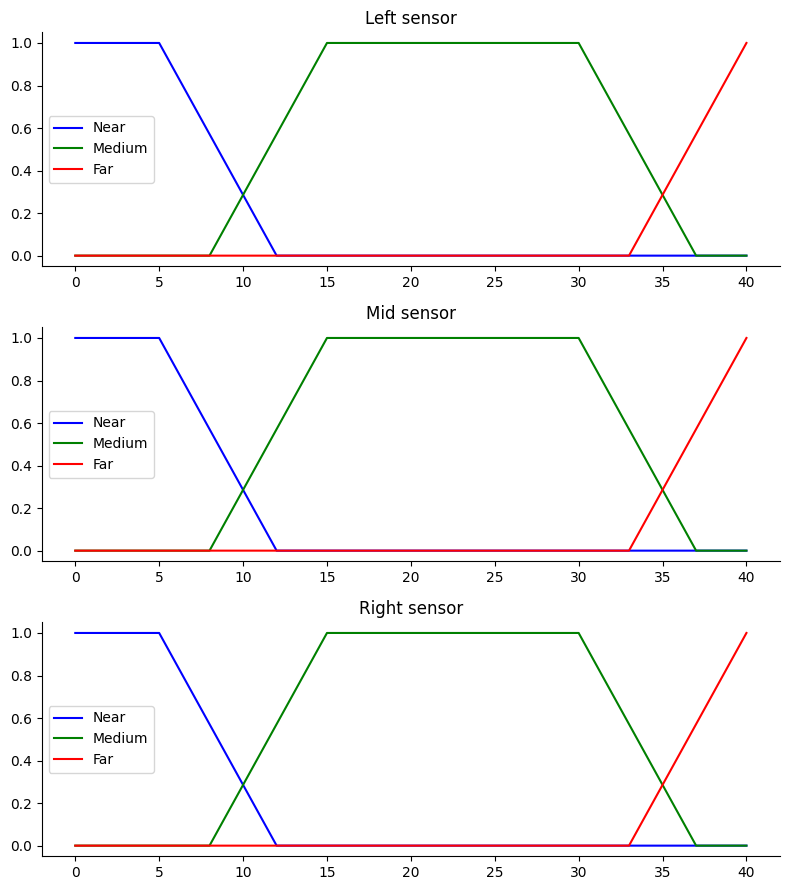

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_sensor = np.arange(0, 41, 1)

left_sensor_nier = fuzz.trapmf(x_sensor, [0, 0, 5, 12])
left_sensor_medium = fuzz.trapmf(x_sensor, [8, 15, 30, 37])
left_sensor_far = fuzz.trapmf(x_sensor, [33, 40, 40, 40])

mid_sensor_nier = fuzz.trapmf(x_sensor, [0, 0, 5, 12])
mid_sensor_medium = fuzz.trapmf(x_sensor, [8, 15, 30, 37])
mid_sensor_far = fuzz.trapmf(x_sensor, [33, 40, 40, 40])

right_sensor_nier = fuzz.trapmf(x_sensor, [0, 0, 5, 12])
right_sensor_medium = fuzz.trapmf(x_sensor, [8, 15, 30, 37])
right_sensor_far = fuzz.trapmf(x_sensor, [33, 40, 40, 40])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_sensor, left_sensor_nier, 'b', linewidth=1.5, label='Near')
ax0.plot(x_sensor, left_sensor_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_sensor, left_sensor_far, 'r', linewidth=1.5, label='Far')
ax0.set_title('Left sensor')
ax0.legend()

ax1.plot(x_sensor, mid_sensor_nier, 'b', linewidth=1.5, label='Near')
ax1.plot(x_sensor, mid_sensor_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_sensor, mid_sensor_far, 'r', linewidth=1.5, label='Far')
ax1.set_title('Mid sensor')
ax1.legend()

ax2.plot(x_sensor, right_sensor_nier, 'b', linewidth=1.5, label='Near')
ax2.plot(x_sensor, right_sensor_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_sensor, right_sensor_far, 'r', linewidth=1.5, label='Far')
ax2.set_title('Right sensor')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

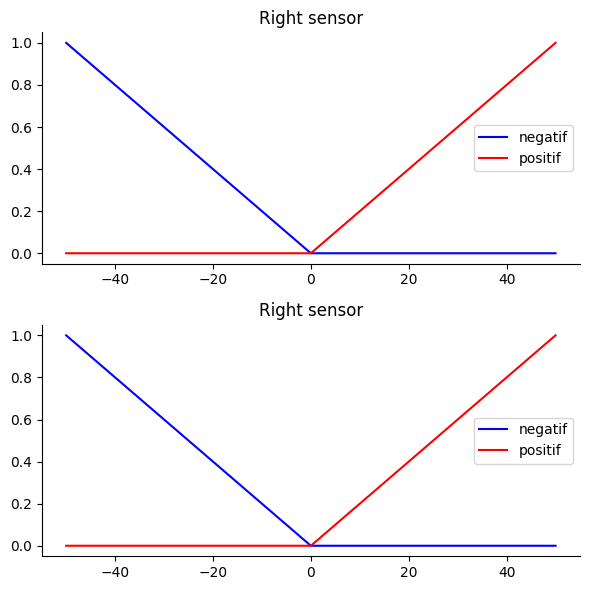

In [2]:

x_motor = np.arange(-50, 51, 1)

right_motor_negatif = fuzz.trapmf(x_motor, [-50, -50, -50, 0])
right_motor_positif = fuzz.trapmf(x_motor, [0, 50, 50, 50])

left_motor_negatif = fuzz.trapmf(x_motor, [-50, -50, -50, 0])
left_motor_positif = fuzz.trapmf(x_motor, [0, 50, 50, 50])

fig, (ax3, ax4) = plt.subplots(nrows=2,figsize=(6, 6))
ax4.plot(x_motor, right_motor_negatif, 'b', linewidth=1.5, label='negatif')
ax4.plot(x_motor, right_motor_positif, 'r', linewidth=1.5, label='positif')
ax4.set_title('Right sensor')
ax4.legend()

ax3.plot(x_motor, left_motor_negatif, 'b', linewidth=1.5, label='negatif')
ax3.plot(x_motor, left_motor_positif, 'r', linewidth=1.5, label='positif')
ax3.set_title('Right sensor')
ax3.legend()

for ax in (ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

Kecepatan motor kiri :  0.0
Kecepatan motor kanan :  32.5


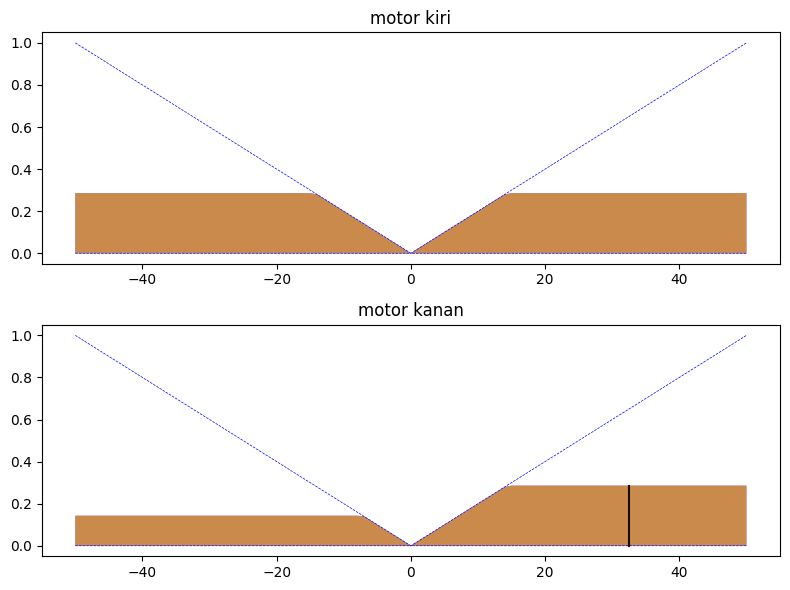

In [4]:
#fuzz
sensor_left =10
sensor_mid =20
sensor_right =9
left_sensor_nier_fuzz = fuzz.interp_membership(x_sensor, left_sensor_nier, sensor_left)
left_sensor_medium_fuzz = fuzz.interp_membership(x_sensor, left_sensor_medium, sensor_left)
left_sensor_far_fuzz = fuzz.interp_membership(x_sensor, left_sensor_far, sensor_left)

mid_sensor_nier_fuzz = fuzz.interp_membership(x_sensor, mid_sensor_nier, sensor_mid)
mid_sensor_medium_fuzz = fuzz.interp_membership(x_sensor, mid_sensor_medium, sensor_mid)
mid_sensor_far_fuzz = fuzz.interp_membership(x_sensor, mid_sensor_far, sensor_mid)

right_sensor_nier_fuzz = fuzz.interp_membership(x_sensor, right_sensor_nier, sensor_right)
right_sensor_medium_fuzz = fuzz.interp_membership(x_sensor, right_sensor_medium, sensor_right)
right_sensor_far_fuzz = fuzz.interp_membership(x_sensor, right_sensor_far, sensor_right)

#Rule
rules_1 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_nier_fuzz))#NEGATIF,NEGATIF
rules_2 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_medium_fuzz))#POSITIF,NEGATIF
rules_3 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_nier_fuzz))#POSITIF,POSITIF
rules_4 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_medium_fuzz))#POSITIF,NEGATIF
rules_5 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF
rules_6 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF
rules_7 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_medium_fuzz))#POSITIF,NEGATIF
rules_8 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_medium_fuzz))#POSITIF,POSITIF
rules_9 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_far_fuzz))#POSITIF,NEGATIF
rules_10 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_nier_fuzz))#POSITIF,POSITIF
rules_11 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_far_fuzz))#POSITIF,NEGATIF
rules_12 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF
rules_13 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF
rules_14 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_far_fuzz))#POSITIF,NEGATIF
rules_15 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_far_fuzz))#POSITI,POSITIF
rules_16 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_far_fuzz))#POSITIF,POSITIF
rules_17 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_medium_fuzz))#POSITIF,POSITIF
rules_18 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_far_fuzz))#POSITIF,POSITIF
rules_19 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_medium_fuzz))#POSITIF,POSITIF
rules_20 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_far_fuzz))#POSITIF,POSITIF
rules_21 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_medium_fuzz))#POSITIF,POSITIF
rules_22 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_medium_fuzz))#POSITIF,NEGATIF
rules_23 = np.fmin(left_sensor_nier_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_far_fuzz))#POSITIF,NEGATIF
rules_24 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_medium_fuzz))#NEGATIF,POSITIF
rules_25 = np.fmin(left_sensor_far_fuzz, np.fmin(mid_sensor_medium_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF
rules_26 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_nier_fuzz, right_sensor_far_fuzz))#POSITIF,NEGATIF
rules_27 = np.fmin(left_sensor_medium_fuzz, np.fmin(mid_sensor_far_fuzz, right_sensor_nier_fuzz))#NEGATIF,POSITIF 

motor0 = np.zeros_like(x_motor)

#Defuzz
negatif_left = np.fmin(np.fmax(rules_1,np.fmax(rules_5,np.fmax(rules_6,np.fmax(rules_12,np.fmax(rules_13,np.fmax(rules_24,np.fmax(rules_25,rules_27))))))),left_motor_negatif)
positif_left= np.fmin(np.fmax(rules_2,np.fmax(rules_3,np.fmax(rules_4,np.fmax(rules_7,np.fmax(rules_8,np.fmax(rules_9,np.fmax(rules_10,np.fmax(rules_11,np.fmax(rules_14,np.fmax(rules_15,np.fmax(rules_16,np.fmax(rules_17,np.fmax(rules_18,np.fmax(rules_19,np.fmax(rules_20,np.fmax(rules_21,np.fmax(rules_22,np.fmax(rules_23,rules_26)))))))))))))))))),left_motor_positif)

negatif_right= np.fmin(np.fmax(rules_1,np.fmax(rules_2,np.fmax(rules_4,np.fmax(rules_7,np.fmax(rules_9,np.fmax(rules_11,np.fmax(rules_14,np.fmax(rules_22,np.fmax(rules_23,rules_26))))))))),right_motor_negatif)
positif_right= np.fmin(np.fmax(rules_3,np.fmax(rules_5,np.fmax(rules_6,np.fmax(rules_8,np.fmax(rules_10,np.fmax(rules_12,np.fmax(rules_13,np.fmax(rules_15,np.fmax(rules_16,np.fmax(rules_17,np.fmax(rules_18,np.fmax(rules_19,np.fmax(rules_20,np.fmax(rules_21,np.fmax(rules_24,np.fmax(rules_25,rules_27)))))))))))))))),right_motor_positif)

# Aggregate all three output membership functions together
aggregated_left = np.fmax(positif_left, negatif_left)
kecepatan_motor_kiri = fuzz.defuzz(x_motor, aggregated_left, 'MOM')
hasi_motor_kiri = fuzz.interp_membership(x_motor, aggregated_left, kecepatan_motor_kiri)

# Aggregate all three output membership functions together
aggregated_right = np.fmax(negatif_right, positif_right)
kecepatan_motot_kanan = fuzz.defuzz(x_motor, aggregated_right, 'MOM')
hasil_motor_kanan = fuzz.interp_membership(x_motor, aggregated_right, kecepatan_motot_kanan)

fig, (ax5, ax6) = plt.subplots(nrows=2, figsize=(8, 6))
ax5.fill_between(x_motor, motor0, negatif_left, facecolor='b', alpha=0.7)
ax5.plot(x_motor, left_motor_negatif, 'b', linewidth=0.5, linestyle='--', )
ax5.fill_between(x_motor, motor0, positif_left, facecolor='b', alpha=0.7)
ax5.plot(x_motor, left_motor_positif, 'b', linewidth=0.5, linestyle='--', )
ax5.set_title('Output membership motor kiri')

ax5.fill_between(x_motor, motor0, aggregated_left, facecolor='Orange', alpha=0.7)
ax5.plot([kecepatan_motor_kiri, kecepatan_motor_kiri], [0, hasi_motor_kiri], 'k', linewidth=1.5, alpha=0.9)
ax5.set_title('motor kiri')

ax6.fill_between(x_motor, motor0, negatif_right, facecolor='b', alpha=0.7)
ax6.plot(x_motor, right_motor_negatif, 'b', linewidth=0.5, linestyle='--', )
ax6.fill_between(x_motor, motor0, positif_right, facecolor='b', alpha=0.7)
ax6.plot(x_motor, right_motor_positif, 'b', linewidth=0.5, linestyle='--', )
ax6.set_title('Output membership motor kanan')

ax6.fill_between(x_motor, motor0, aggregated_right, facecolor='Orange', alpha=0.7)
ax6.plot([kecepatan_motot_kanan, kecepatan_motot_kanan], [0, hasil_motor_kanan], 'k', linewidth=1.5, alpha=0.9)
ax6.set_title('motor kanan')

print("Kecepatan motor kiri : ", kecepatan_motor_kiri)
print("Kecepatan motor kanan : ", kecepatan_motot_kanan)

#def calculate_motor(signal):
    #return (signal/100)*255
    
#turbin = calculate_motor(kecepatan_turbin)
#print("Kecepatan Turbin : ", turbin)
# Turn off top/right axes
for ax in (ax0,ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [ ]:
def map_value(value):
    # Mengonversi nilai dari rentang -100 hingga -60 menjadi rentang 0 hingga 40
    return int((value + 100) * 1)

# Contoh penggunaan
nilai_input = int(input("Masukkan nilai (-100 hingga -60): "))
if -100 <= nilai_input <= -60:
    nilai_terkonversi = map_value(nilai_input)
    print(f"Nilai terkonversi: {nilai_terkonversi}")
else:
    print("Input diluar rentang yang valid (-100 hingga -60).")


In [ ]:
def map_value(value):
    # Mengonversi nilai dari rentang -50 hingga 50 menjadi rentang -6.28 hingga 6.28
    return (value / 10) 

# Contoh penggunaan
nilai_input = float(input("Masukkan nilai (-50 hingga 50): "))
if -50 <= nilai_input <= 50:
    nilai_terkonversi = map_value(nilai_input)
    print(f"Nilai terkonversi: {nilai_terkonversi:.2f}")
else:
    print("Input diluar rentang yang valid (-50 hingga 50).")


Masukkan nilai (-50 hingga 50):  -50


Nilai terkonversi: -5.00


In [ ]:
import pandas as pd

# Membaca file CSV
file_path = "gps.csv"  # Ubah dengan path file CSV yang benar
data = pd.read_csv(file_path)

# Menampilkan nama kolom
print("Nama-nama Kolom:")
for column in data.columns:
    print(column)


Nama-nama Kolom:
0.55;;0.43


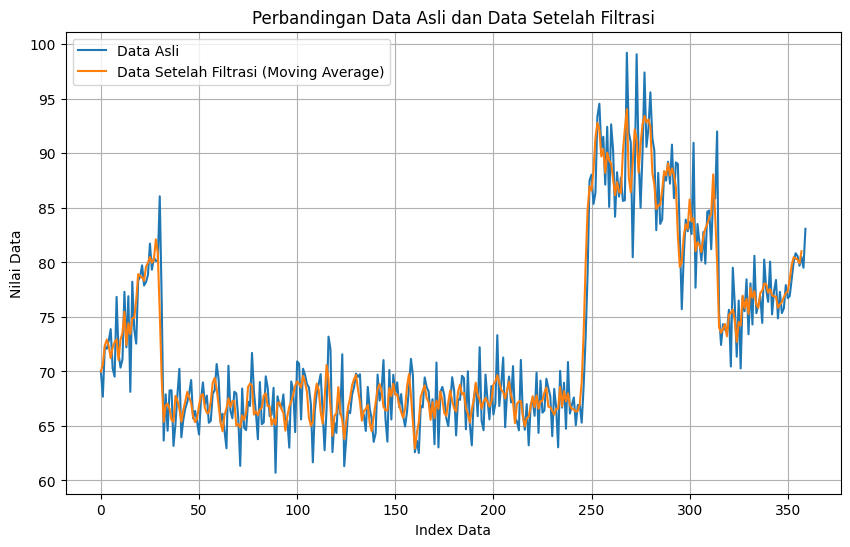

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    """
    Mengaplikasikan metode moving average pada data untuk meredakan noise.
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def main():
    # Membaca data dari file CSV
    file_path = "sensorkanan.csv"  # Ganti dengan path file CSV yang benar
    data = pd.read_csv(file_path)

    # Konversi data ke dalam array numpy untuk meningkatkan kecepatan komputasi
    data_array = data.values.flatten()

    # Menentukan ukuran jendela moving average
    window_size = 3  # Ubah ukuran jendela sesuai kebutuhan

    # Mengaplikasikan moving average pada data
    data_filtered = moving_average(data_array, window_size)

    # Plot data asli dan data yang telah difilter
    plt.figure(figsize=(10, 6))
    plt.plot(data_array, label='Data Asli')
    plt.plot(data_filtered, label='Data Setelah Filtrasi (Moving Average)')
    plt.xlabel('Index Data')
    plt.ylabel('Nilai Data')
    plt.title('Perbandingan Data Asli dan Data Setelah Filtrasi')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


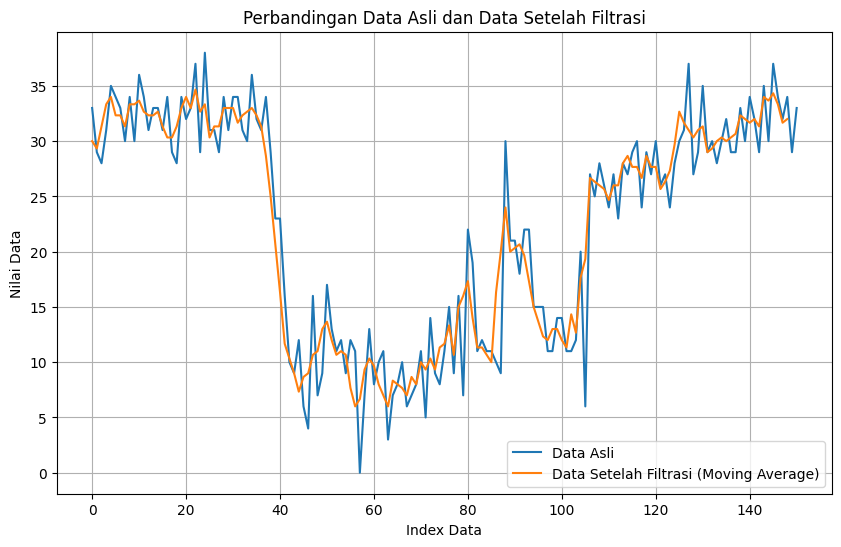

Overshoot: 2.1666666666666643
Settling Time: None


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    """
    Mengaplikasikan metode moving average pada data untuk meredakan noise.
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def calculate_transient_response(original_data, filtered_data, settling_percentage=5):
    """
    Menghitung nilai overshoot dan settling time dari data yang telah difilter.
    """
    # Menghitung steady-state
    steady_state = np.mean(original_data[-10:])  # Mengambil rata-rata dari 10 data terakhir sebagai steady-state

    # Menghitung overshoot
    overshoot = np.max(filtered_data) - steady_state

    # Menghitung settling time
    settling_threshold = steady_state + (settling_percentage / 100) * overshoot
    settling_indices = np.where(np.abs(filtered_data - steady_state) < (0.01 * settling_percentage * overshoot))[0]
    settling_time = settling_indices[0] if settling_indices.any() else None

    return overshoot, settling_time

def main():
    # Membaca data dari file CSV
    file_path = "sensorkanancon.csv"  # Ganti dengan path file CSV yang benar
    data = pd.read_csv(file_path)

    # Konversi data ke dalam array numpy untuk meningkatkan kecepatan komputasi
    data_array = data.values.flatten()

    # Menentukan ukuran jendela moving average
    window_size = 3  # Ubah ukuran jendela sesuai kebutuhan

    # Mengaplikasikan moving average pada data
    data_filtered = moving_average(data_array, window_size)

    # Plot data asli dan data yang telah difilter
    plt.figure(figsize=(10, 6))
    plt.plot(data_array, label='Data Asli')
    plt.plot(data_filtered, label='Data Setelah Filtrasi (Moving Average)')
    plt.xlabel('Index Data')
    plt.ylabel('Nilai Data')
    plt.title('Perbandingan Data Asli dan Data Setelah Filtrasi')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Menghitung nilai overshoot dan settling time
    overshoot, settling_time = calculate_transient_response(data_array[window_size-1:], data_filtered)
    print("Overshoot:", overshoot)
    print("Settling Time:", settling_time)

if __name__ == "__main__":
    main()


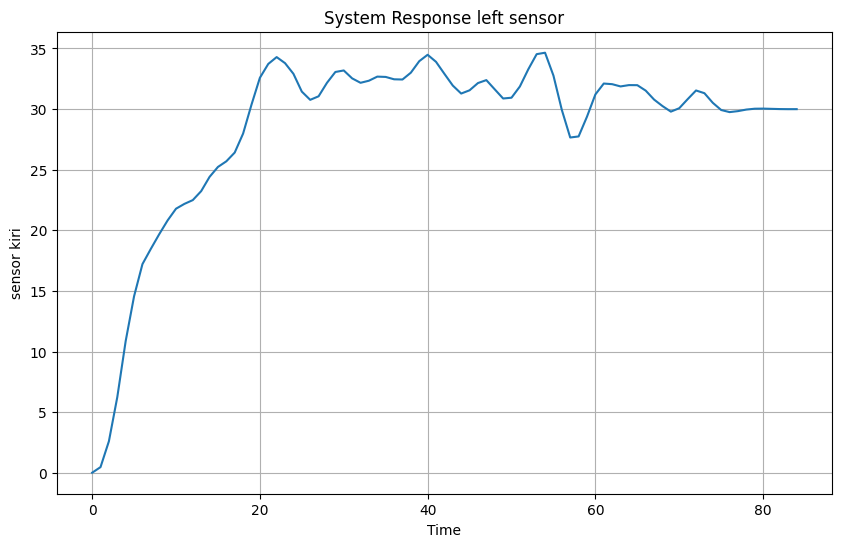

Nilai error: 0.0
Overshoot: 0.155193184191929
Settling Time: 0.84


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def moving_average(data, window_size):
    """
    Mengaplikasikan metode moving average pada data untuk meredakan noise.
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def calculate_transient_response(original_data, filtered_data):
    """
    Menghitung nilai transient response dari data yang telah difilter.
    """
    return np.mean(np.abs(original_data - filtered_data))

def main():
    # Membaca data dari file CSV
    file_path = "sensorkiri.csv"  # Ganti dengan path file CSV yang benar
    data = pd.read_csv(file_path)

    # Konversi data ke dalam array numpy untuk meningkatkan kecepatan komputasi
    data_array = data.values.flatten()

    # Menentukan ukuran jendela moving average
    window_size = 3  # Ubah ukuran jendela sesuai kebutuhan

    # Mengaplikasikan moving average pada data
    data_filtered = moving_average(data_array, window_size)

    # Membuat model sistem dari data yang telah difilter
    sys = ctrl.TransferFunction([1], [1, 1, 1])  # Contoh: membuat model sistem orde 2

    # Menyimulasikan respons sistem
    time_response, output_response = ctrl.forced_response(sys, T=np.arange(len(data_filtered)), U=data_filtered)

    # Plot respons sistem
    plt.figure(figsize=(10, 6))
    plt.plot(time_response, output_response)
    plt.xlabel('Time')
    plt.ylabel('sensor kiri')
    plt.title('System Response left sensor')
    plt.grid(True)
    plt.show()

    # Menghitung nilai error, overshoot, dan settling time
    steady_state = output_response[-1]
    error = steady_state - output_response[-1]
    overshoot = (np.max(output_response) - steady_state) / steady_state
    settling_time_index = np.where(np.abs(output_response - steady_state) < 0.02 * steady_state)[0]
    settling_time = time_response[settling_time_index[-1]] if settling_time_index.any() else None

    print("Nilai error:", error)
    print("Overshoot:", overshoot)
    print("Settling Time:", settling_time/100)

if __name__ == "__main__":
    main()


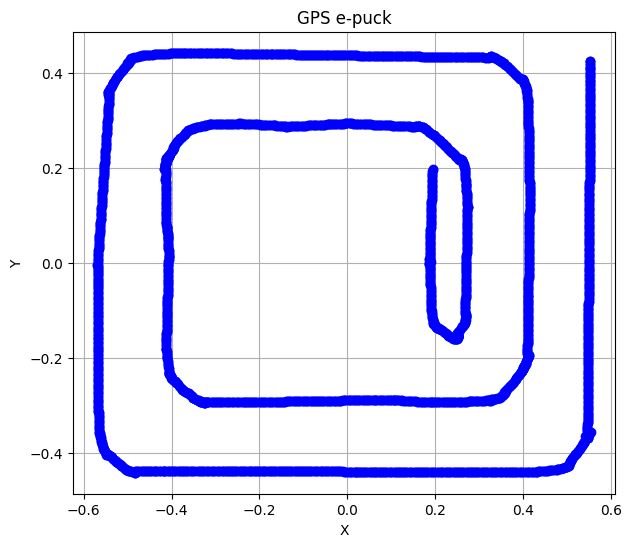

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv("data_value.csv")

# Asumsikan file CSV memiliki kolom 'x' dan 'y'
# Kamu bisa menyesuaikan nama kolom sesuai dengan struktur file CSV kamu
x = data['gps value x']
y = data['gps value y']

# Membuat grafik
plt.figure(figsize=(7, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('GPS e-puck')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show() 


In [ ]:
csv_file_name = 'data_value.csv'
if os.path.exists(csv_file_name):
    os.remove(csv_file_name)

def save_to_csv(data):
    with open(csv_file_name, mode='a', newline='') as file:
        writer = csv.writer(file)
     
        if file.tell() == 0:
            writer.writerow(['Time', 'SpeedMotor', 'ErrorValue', 'SensorAccelerometer']) 
        writer.writerow(data)

In [105]:
import csv

def hitung_rata_rata_kolom_dari_nama(nama_file, nama_kolom):
    total = 0
    jumlah_data = 0
    indeks_kolom = None
    
    with open(nama_file, 'r') as file_csv:
        pembaca_csv = csv.reader(file_csv)
        
        header = next(pembaca_csv)  # Baca header
        try:
            indeks_kolom = header.index(nama_kolom)  # Temukan indeks kolom dari nama
        except ValueError:
            print("Kolom dengan nama", nama_kolom, "tidak ditemukan.")
            return None
        
        for baris in pembaca_csv:
            try:
                data = float(baris[indeks_kolom])  # Ambil data dari kolom yang ditentukan
                total += data
                jumlah_data += 1
            except (IndexError, ValueError):
                # Lewati baris jika indeks kolom tidak valid atau data tidak dapat diubah menjadi float
                continue
    
    if jumlah_data == 0:
        return None  # Kembalikan None jika tidak ada data
    
    rata_rata = total / jumlah_data
    return rata_rata

# Contoh penggunaan:
nama_file = 'data_value.csv'  # Ubah dengan nama file CSV yang sesuai
nama_kolom = 'motor kanan'  # Ubah dengan nama kolom yang ingin Anda proses
rata_rata = hitung_rata_rata_kolom_dari_nama(nama_file, nama_kolom)

if rata_rata is not None:
    print("Rata-rata dari kolom", nama_kolom, "dalam file", nama_file, "adalah:", rata_rata)
else:
    print("Tidak ada data dalam kolom", nama_kolom, "dalam file", nama_file)


Rata-rata dari kolom motor kanan dalam file data_value.csv adalah: 3.3028607755880843
